Wykorzystywane biblioteki

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

Dane

Pobieranie danych

In [2]:
DATA_FOLDER = os.path.join(os.getcwd(), 'dane2')
datasets = {}

Inflacja

In [3]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Inflacja.csv'), sep=';')
print(data.head())
inflation_dict = {data['rok'][i]: data['wartosc'][i] for i in range(len(data))}
inflation_dict 

    rok  wartosc   sposob prezentacji
0  1999    107.3  Rok poprzedni = 100
1  2000    110.1  Rok poprzedni = 100
2  2001    105.5  Rok poprzedni = 100
3  2002    101.9  Rok poprzedni = 100
4  2003    100.8  Rok poprzedni = 100


{1999: 107.3,
 2000: 110.1,
 2001: 105.5,
 2002: 101.9,
 2003: 100.8,
 2004: 103.5,
 2005: 102.1,
 2006: 101.0,
 2007: 102.5,
 2008: 104.2,
 2009: 103.5,
 2010: 102.6,
 2011: 104.3,
 2012: 103.7,
 2013: 100.9,
 2014: 100.0,
 2015: 99.1,
 2016: 99.4,
 2017: 102.0,
 2018: 101.6,
 2019: 102.3,
 2020: 103.4,
 2021: 105.1,
 2022: 114.4,
 2023: 111.4}

Nakłady na B / R w przeliczeniu na mieszkańca

In [4]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Naklady_BR_na_mieszkanca.csv'), sep=';')
IMPORTANT_COLUMNS = ['rok', 'wartosc']
data = data[IMPORTANT_COLUMNS]
data.rename(columns={'rok': 'rok'}, inplace=True)
datasets['Naklady_BR_na_mieszkanca'] = data
data.head()
# data = pd.read_csv(os.path.join(DATA_FOLDER, 'Naklady_BR_na_mieszkanca.csv'), sep=';')
# datasets['Naklady_BR_na_mieszkanca.csv'] = data
# data.head()

,rok,wartosc
0,1999,119
1,2000,125
2,2001,127
3,2002,118
4,2003,119


Nakłady na B / R według sektorów

Sektor przedsiębiorstw (BES)

In [5]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Naklady_BR_sektor_BES.csv'), sep=';')
IMPORTANT_COLUMNS = ['rok', 'wartosc']
data = data[IMPORTANT_COLUMNS]
data.rename(columns={'rok': 'rok'}, inplace=True)
datasets['Naklady_BR_sektor_BES'] = data
data.head()

,rok,wartosc
0,2010,2773545.9
1,2011,3521602.4
2,2012,5341069.8
3,2013,6291241.2
4,2014,7532079.4


Sektor rządowy (GOV)


In [6]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Naklady_BR_sektor_GOV.csv'), sep=';')
IMPORTANT_COLUMNS = ['rok', 'wartosc']
data = data[IMPORTANT_COLUMNS]
data.rename(columns={'rok': 'rok'}, inplace=True)
datasets['Naklady_BR_sektor_GOV'] = data
data.head()

,rok,wartosc
0,2010,3738891.8
1,2011,4035832.9
2,2012,4012943.3
3,2013,3869799.9
4,2014,3872714.3


Sektor szkolnictwa wyższego (HES)


In [7]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Naklady_BR_sektor_HES.csv'), sep=';')
IMPORTANT_COLUMNS = ['rok', 'wartosc']
data = data[IMPORTANT_COLUMNS]
data.rename(columns={'rok': 'rok'}, inplace=True)
datasets['Naklady_BR_sektor_HES'] = data
data.head()

,rok,wartosc
0,2010,3874091.7
1,2011,4102261.5
2,2012,4942174.3
3,2013,4220307.0
4,2014,4714844.4


Sektor prywatnych instytucji niekomercyjnych (PNP)


In [8]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Naklady_BR_sektor_PNP.csv'), sep=';')
IMPORTANT_COLUMNS = ['rok', 'wartosc']
data = data[IMPORTANT_COLUMNS]
data.rename(columns={'rok': 'rok'}, inplace=True)
datasets['Naklady_BR_sektor_PNP'] = data
data.head()

,rok,wartosc
0,2010,29628.8
1,2011,27009.0
2,2012,56727.2
3,2013,42440.5
4,2014,48591.2


Sektory ogółem

In [9]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Naklady_BR_sektory.csv'), sep=';')
IMPORTANT_COLUMNS = ['rok', 'wartosc']
data = data[IMPORTANT_COLUMNS]
data.rename(columns={'rok': 'rok'}, inplace=True)
datasets['Naklady_BR_sektory.csv'] = data
data.head()

,rok,wartosc
0,2010,10416158.2
1,2011,11686705.8
2,2012,14352914.6
3,2013,14423788.6
4,2014,16168229.3


Wykresy

Nakłady na B / R w przeliczeniu na jednego mieszkańca

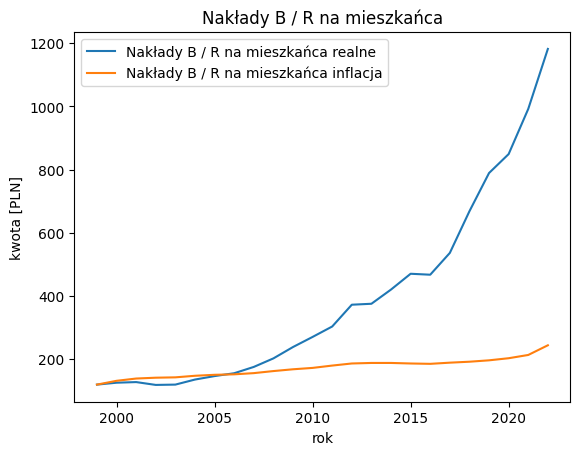

In [10]:
data = datasets["Naklady_BR_na_mieszkanca"]

year_value_dict = {
    year: value for year, value in zip(data['rok'], data['wartosc'])
}
earliest_price = year_value_dict[min(year_value_dict.keys())]
for year, value in sorted(year_value_dict.items())[1:]:
    earliest_price = round(earliest_price * (inflation_dict[year] / 100), 2)
    year_value_dict[year] = earliest_price

    
plt.plot(data['rok'], data['wartosc'], label=f'Nakłady B / R na mieszkańca realne')
plt.plot(list(year_value_dict.keys()), list(year_value_dict.values()), label=f'Nakłady B / R na mieszkańca inflacja')
plt.xlabel('rok')
plt.ylabel('kwota [PLN]')
plt.title(f'Nakłady B / R na mieszkańca')
plt.legend()

plt.show()

Nakłady na B / R według sektorów wykonawczych (wszystko na jednym wykresie)

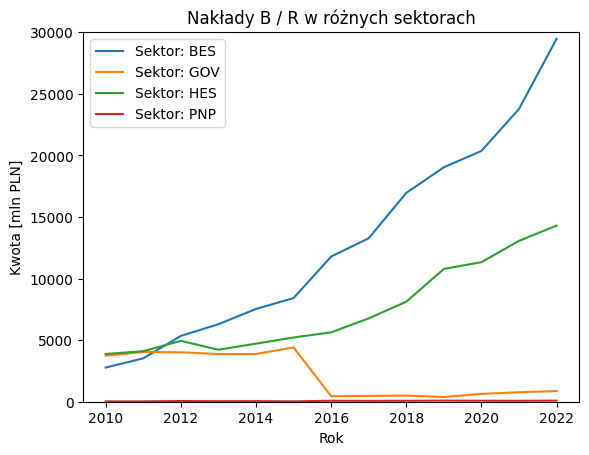

In [11]:
# Wczytanie danych z sektorów BES, GOV, HES, PNP
sectors = ['BES', 'GOV', 'HES', 'PNP']
for sector in sectors:
    data = datasets[f"Naklady_BR_sektor_{sector}"]
    # Konwersja wartości z tysięcy na miliony
    plt.plot(data['rok'], data['wartosc'] / 1000, label=f'Sektor: {sector}')


plt.ylim(0, 30000)
plt.xlabel('Rok')
plt.ylabel('Kwota [mln PLN]')
plt.title('Nakłady B / R w różnych sektorach')


ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.legend()
plt.show()


Nakłady na B / R według sektorów wykonawczych (każdy osobno)

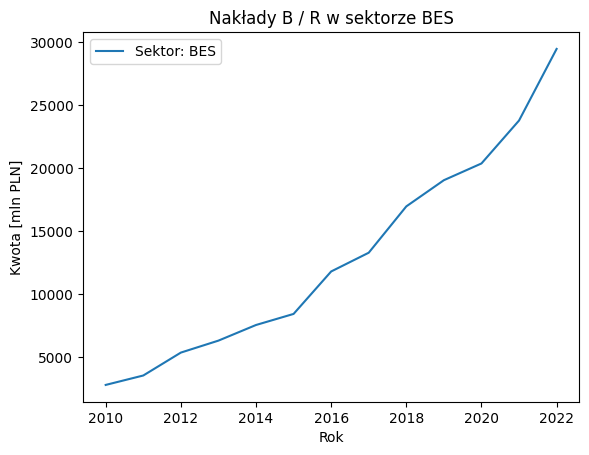

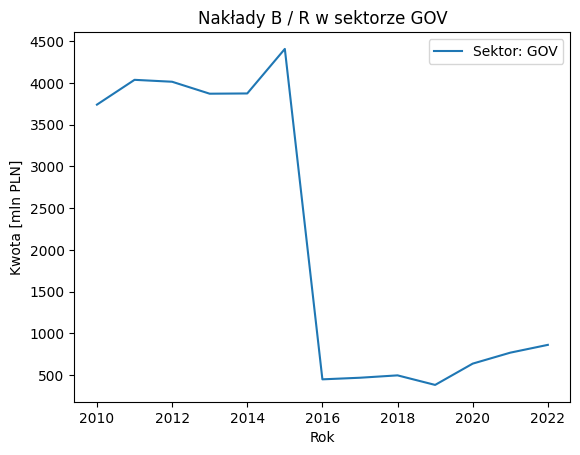

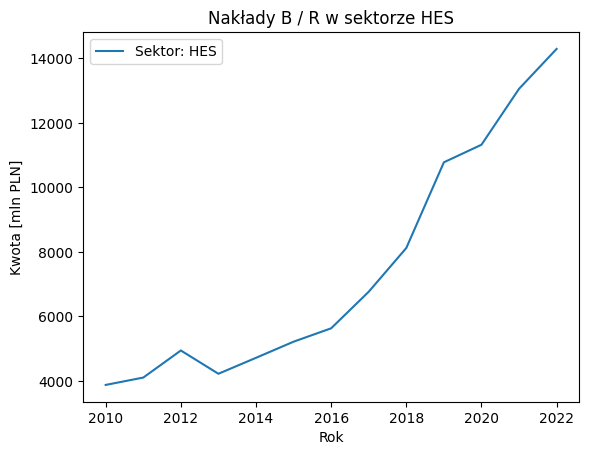

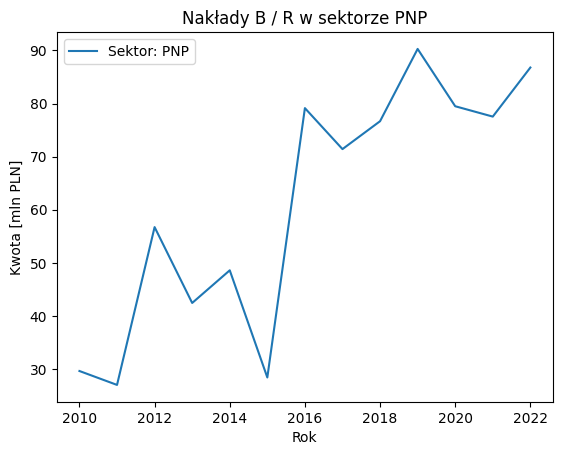

In [12]:
sectors = ['BES', 'GOV', 'HES', 'PNP']
for sector in sectors:
    data = datasets[f"Naklady_BR_sektor_{sector}"]

    plt.plot(data['rok'], data['wartosc'] / 1000, label=f'Sektor: {sector}')
    plt.xlabel('Rok')
    plt.ylabel('Kwota [mln PLN]')
    plt.title(f'Nakłady B / R w sektorze {sector}')

    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

    plt.legend()
    plt.show()

Sumaryczne nakłady B/R dla wszystkich sektorów

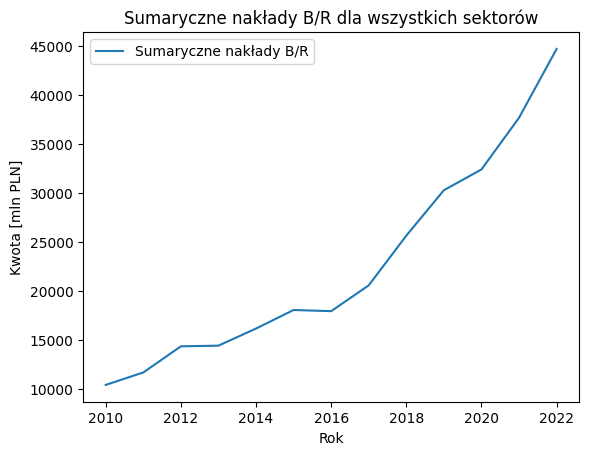

In [13]:
data = datasets['Naklady_BR_sektory.csv']
total_investments = data.groupby('rok')['wartosc'].sum()

plt.plot(total_investments.index, total_investments.values / 1000, label='Sumaryczne nakłady B/R')
plt.xlabel('Rok')
plt.ylabel('Kwota [mln PLN]')
plt.title('Sumaryczne nakłady B/R dla wszystkich sektorów')

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.legend()
plt.show()